In [1]:
#import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
reload(observations)
reload(state)
reload(mcmc)
reload(driver)

<module 'driver' from 'driver.pyc'>

In [3]:
initial = [{'a': 0.2275, 'h': 0.00,'k': 0.00, 'm': 0.001965}]
label, Niter, Nwalkers, Scale = 'simple_mh_1', 32*50, 2, {'a': 0.0003, 'h': 0.01, 'k': 0.01, 'm': 0.03}

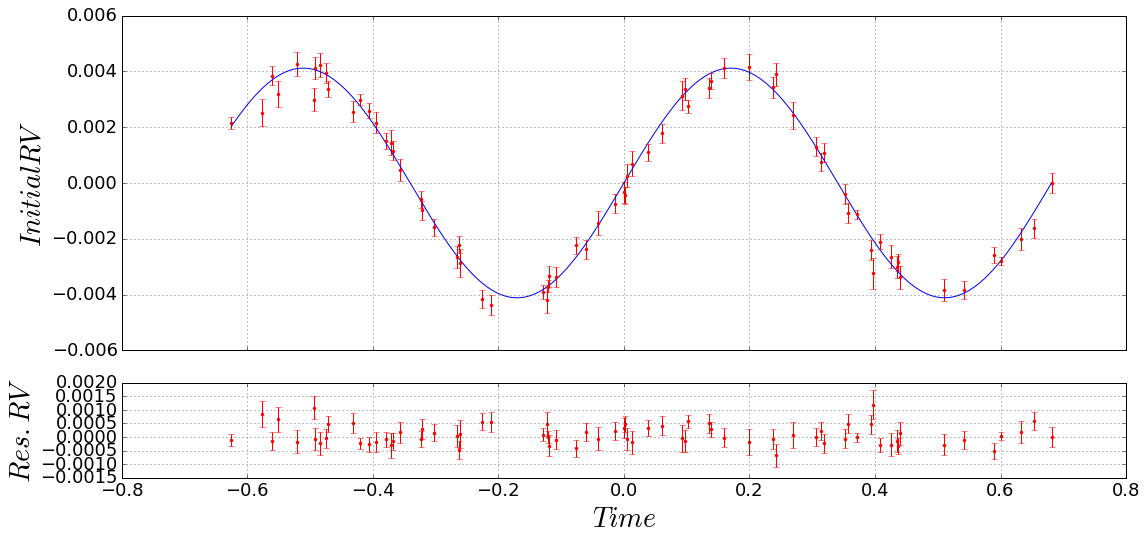

In [4]:
initial_state = state.State(planets = initial, ignore_vars='m')
obs = driver.createObs(initial_state, 70, 3.5e-4, 9e-5, 1.37)
driver.inLinePlotObs(initial_state, obs, [18,6])

# Start with MH|

In [5]:
mhbundle1, mhH1 = driver.createMH('simple_mh_1',Niter, initial_state, obs, Scale, 5)

Progress: 0.0625%, 2 accepted steps have been made, time: 2017-03-08 05:52:13.272912
Progress: 9.4375%, 110 accepted steps have been made, time: 2017-03-08 05:52:13.903803
Progress: 18.812%, 198 accepted steps have been made, time: 2017-03-08 05:52:14.488112
Progress: 28.188%, 301 accepted steps have been made, time: 2017-03-08 05:52:15.038669
Progress: 37.562%, 399 accepted steps have been made, time: 2017-03-08 05:52:15.577589
Progress: 46.938%, 493 accepted steps have been made, time: 2017-03-08 05:52:16.134317
Progress: 56.312%, 580 accepted steps have been made, time: 2017-03-08 05:52:16.701769
Progress: 65.688%, 681 accepted steps have been made, time: 2017-03-08 05:52:17.250695
Progress: 75.062%, 779 accepted steps have been made, time: 2017-03-08 05:52:17.803047
Progress: 84.438%, 885 accepted steps have been made, time: 2017-03-08 05:52:18.528116
Progress: 93.812%, 980 accepted steps have been made, time: 2017-03-08 05:52:19.111743
Acceptance rate: 65.250%
The id of the simula

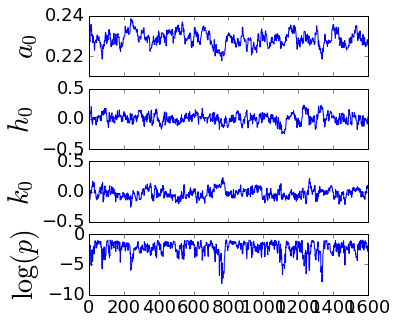

In [6]:
driver.inLinePlotChains(mhbundle1, [5,5])

Eliminated burn in, sampled every 1.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$h_0$', '$k_0$']
[ 0.22837973  0.00290905 -0.02117195]


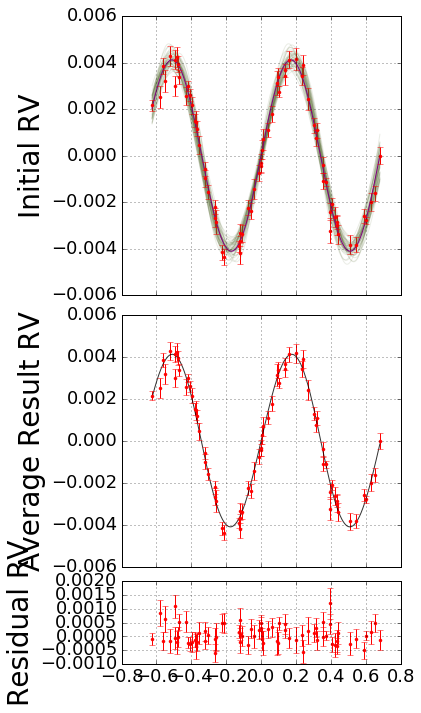

In [10]:
trimres, trimlogp = driver.inLinePlotResults(mhbundle1, 50, [5,5], 0.2, 1)

In [8]:
# driver.inLinePlotCorners(mhbundle1, 'test', True)

In [11]:
mhbundle1.mcmc_trimmedchain, mhbundle1.mcmc_trimmedchainlogp  = trimres, trimlogp
actimes = driver.inLinePlotAcTimes(mhbundle1, [5,5], name='test', save=True)

AC time 12.0
AC time 7.0
AC time 7.0


In [ ]:
reload(observations)
reload(state)
reload(mcmc)
reload(driver)

# Smala

In [ ]:
smbundle1, smH1 = driver.createSMALA('simple_mh_1',Niter/4, initial_state, obs, 0.4, 0.14)

In [ ]:
driver.inLinePlotChains(smbundle1, [5,5])

In [ ]:
actimes = driver.inLinePlotAcTimes(smbundle1, [5,5])

In [ ]:
driver.inLinePlotResultsCombi(smbundle1, 50, [5,5],0.1, 1)

In [ ]:
reload(observations)
reload(state)
reload(mcmc)
reload(driver)

# Emcee

In [ ]:
embundle1, smH1 = driver.createEns('simple_emcee_1',Niter*10, initial_state, obs, 8, Scale)

In [ ]:
driver.inLinePlotChains(embundle1, [5,5])

In [ ]:
actimes = driver.inLinePlotAcTimes(embundle1, [5,5], 'ayaaa', True)

In [ ]:
print embundle1.mcmc_Niter
trimres, reslogp = driver.inLinePlotResultsCombi(embundle1, 50, [5,5], 0.2, 1)
print len(trimres)
print len(reslogp)

In [ ]:
reload(mcmc)

# ALSMALA

In [ ]:
ALS = mcmc.Alsmala(initial_state, obs, 0.6, 0.14)

In [ ]:
ALS.generate_proposal()

In [ ]:
print ALS.state.logp
print ALS.state.logp_d
print ALS.state.logp_dd

In [ ]:
ALS.step()

In [ ]:
print ALS.state.logp
print ALS.state.logp_d
print ALS.state.logp_dd

In [ ]:
sa = ALS.generate_proposal()
print ALS.transitionProbability(sa, ALS.state)
print ALS.transitionProbability(ALS.state, sa)
print sa.logp, sa.logp_d, sa.logp_dd
print '------'
print ALS.state.logp, ALS.state.logp_d, ALS.state.logp_dd

In [ ]:
sa = ALS.generate_proposal_mala()
print ALS.transitionProbability_mala(sa, ALS.state)
print ALS.transitionProbability_mala(ALS.state, sa)
print sa.logp, sa.logp_d, sa.logp_dd
print '------'
print ALS.state.logp, ALS.state.logp_d, ALS.state.logp_dd

In [ ]:
reload(mcmc)
reload(driver)
reload(state)

In [ ]:
al_bundle, hl = driver.createALSMALA('simple_al_1', 20000, initial_state, obs, 0.2, 0.14, 5, 0.1, printing_every=2000)

In [ ]:
sl_bundle2, h2 = driver.createSMALA('simple_sm_2', 20000, initial_state, obs, 0.2, 0.14, printing_every=2000)

In [ ]:
driver.inLinePlotResults(sl_bundle2, 50, [6,6], 0.4, 1)

In [ ]:
driver.inLinePlotResults(al_bundle, 50, [6,6], 0.4, 1)

In [ ]:
actimesSM = driver.inLinePlotAcTimes(sl_bundle2, [10, 4])

In [ ]:
actimesAL= driver.inLinePlotAcTimes(al_bundle, [10,4])

# Fixing emcee 'acc rate'